In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pymysql pandas

In [2]:
import pandas as pd
import pymysql

conn = pymysql.connect(
    host='localhost',
    user='root',
    password='*********',
    db='Amazon_Sales'
)
df = pd.read_sql("SELECT * FROM sales", conn)
df.to_csv('/Users/tanmac/Desktop/amazon_sales.csv', index=False, quoting=1)
conn.close()

/var/folders/8g/00b3gbs92n16plbgtl71gh8h0000gn/T/ipykernel_60960/3053698972.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM sales", conn)


In [3]:
df.head(10)
df.tail(10)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Item Status                   8523 non-null   object
 1   Item Identifier               8523 non-null   object
 2   Item Category                 8523 non-null   object
 3   Warehouse Establishment Year  8523 non-null   object
 4   Warehouse Identifier          8523 non-null   object
 5   Warehouse Location            8523 non-null   object
 6   Warehouse Size                8523 non-null   object
 7   Warehouse Type                8523 non-null   object
 8   Item Engagement Rate          8523 non-null   object
 9   Item Weight                   8523 non-null   object
 10  Sales                         8523 non-null   object
 11  Rating                        8523 non-null   object
dtypes: object(12)
memory usage: 799.2+ KB


(8523, 12)

In [4]:
df.columns

Index(['Item Status', 'Item Identifier', 'Item Category',
       'Warehouse Establishment Year', 'Warehouse Identifier',
       'Warehouse Location', 'Warehouse Size', 'Warehouse Type',
       'Item Engagement Rate', 'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [5]:
df

,Item Status,Item Identifier,Item Category,Warehouse Establishment Year,Warehouse Identifier,Warehouse Location,Warehouse Size,Warehouse Type,Item Engagement Rate,Item Weight,Sales,Rating
0,Non-Discounted,AMZ32,Electronics,2019,SIDA,Rural,Medium,Mega FC,0.10001349999999999,1.26199364861554,10495.3657641382,5
1,Discounted,BAS42,Home Entertainment,2022,DEL5,Urban,Medium,Regional FC,0.008596051,3.07950784584403,2151.98346077715,5
2,Non-Discounted,SDD28,Apparel,2016,SGAA,Rural,Small,Mega FC,0.025896485,0.5679997261334151,679.492310355249,5
3,Non-Discounted,FDL50,"Books, Games & Toys",2014,BLR5,Urban,Large,Mega FC,0.042277867000000004,0.7034657573695811,207.6083195441,5
4,Discounted,DRI25,Smart Home,2015,SATA,Suburban,Small,Mega FC,0.033970195,2.19286704498239,2380.3679227817197,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,discounted,NCT53,Home Entertainment,2018,HYD8,Urban,Medium,Last-Mile Hub,0.016486511000000002,1.81448725500913,6776.23269527072,4
8519,discounted,FDN09,Household,2018,HYD8,Urban,Medium,Last-Mile Hub,0.034705807000000005,3.72620997571768,1016.7962854611899,4
8520,discounted,DRE13,Smart Home,2018,HYD8,Urban,Medium,Last-Mile Hub,0.027570939000000003,2.04768085238002,2060.67192961371,4
8521,no sale,FDT50,Groceries,2018,HYD8,Urban,Medium,Last-Mile Hub,0.10771483400000001,1.36478981869924,153.977315718208,4


## Cleaning the data

In [6]:
df2 = df

In [7]:
if df2.duplicated().any():
    print('There are duplicate rows in the DataFrame.')
    duplicates_df = df2[df2.duplicated(keep=False)]
    print(f'The duplicate rows are:\n{duplicates_df}')
else:
    print('No duplicate rows found.')

No duplicate rows found.


In [8]:
print(df2['Item Status'].unique())

['Non-Discounted' 'Discounted' 'discounted' 'Disc' 'no sale']


In [9]:
df2['Item Status'].replace({'discounted': 'Discounted', 'Disc':'Discounted','no sale':'Non-Discounted'}, inplace=True)

/var/folders/8g/00b3gbs92n16plbgtl71gh8h0000gn/T/ipykernel_60960/2157416705.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Item Status'].replace({'discounted': 'Discounted', 'Disc':'Discounted','no sale':'Non-Discounted'}, inplace=True)


In [10]:
cols_to_convert = ['Item Engagement Rate', 'Item Weight', 'Sales', 'Rating']
for col in cols_to_convert:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

In [11]:
df2.rename(columns={'Item Status':'item_status','Item Identifier':'item_id', 'Item Category':'category',
                    'Warehouse Establishment Year':'year_est', 'Warehouse Identifier': 'warehouse_id', 'Warehouse Location': 'location',
                    'Warehouse Size':'warehouse_size', 'Warehouse Type':'warehouse_type', 'Item Engagement Rate':'item_engagement',
                    'Item Weight':'item_wt'}, inplace=True)
df2.columns

Index(['item_status', 'item_id', 'category', 'year_est', 'warehouse_id',
       'location', 'warehouse_size', 'warehouse_type', 'item_engagement',
       'item_wt', 'Sales', 'Rating'],
      dtype='object')

## KPIs

In [12]:
# 1. Total Sales
total_sales = df['Sales'].sum()

In [13]:
# 2. Average Sales
avg_sales = df['Sales'].mean()

In [14]:
# 3. Total no. of products sold
total_items_sold = df.item_id.count()

In [15]:
# 4. The average rating of each product
avg_rating = df.Rating.mean()

In [16]:
print('The KPI Requirements are as follows:\n\n',
      f'1. The total sales is: ₹{round(total_sales/1e7,2)} Crores\n',
      f'2. The average sale per product is: ₹{round(avg_sales,0)}\n',
      f'3. The total number of products sold are: {total_items_sold} products\n',
      '4. The average rating of each product sold is:', round(avg_rating,2))

The KPI Requirements are as follows:

 1. The total sales is: ₹3.19 Crores
 2. The average sale per product is: ₹3744.0
 3. The total number of products sold are: 8523 products
 4. The average rating of each product sold is: 3.97


## Visualization

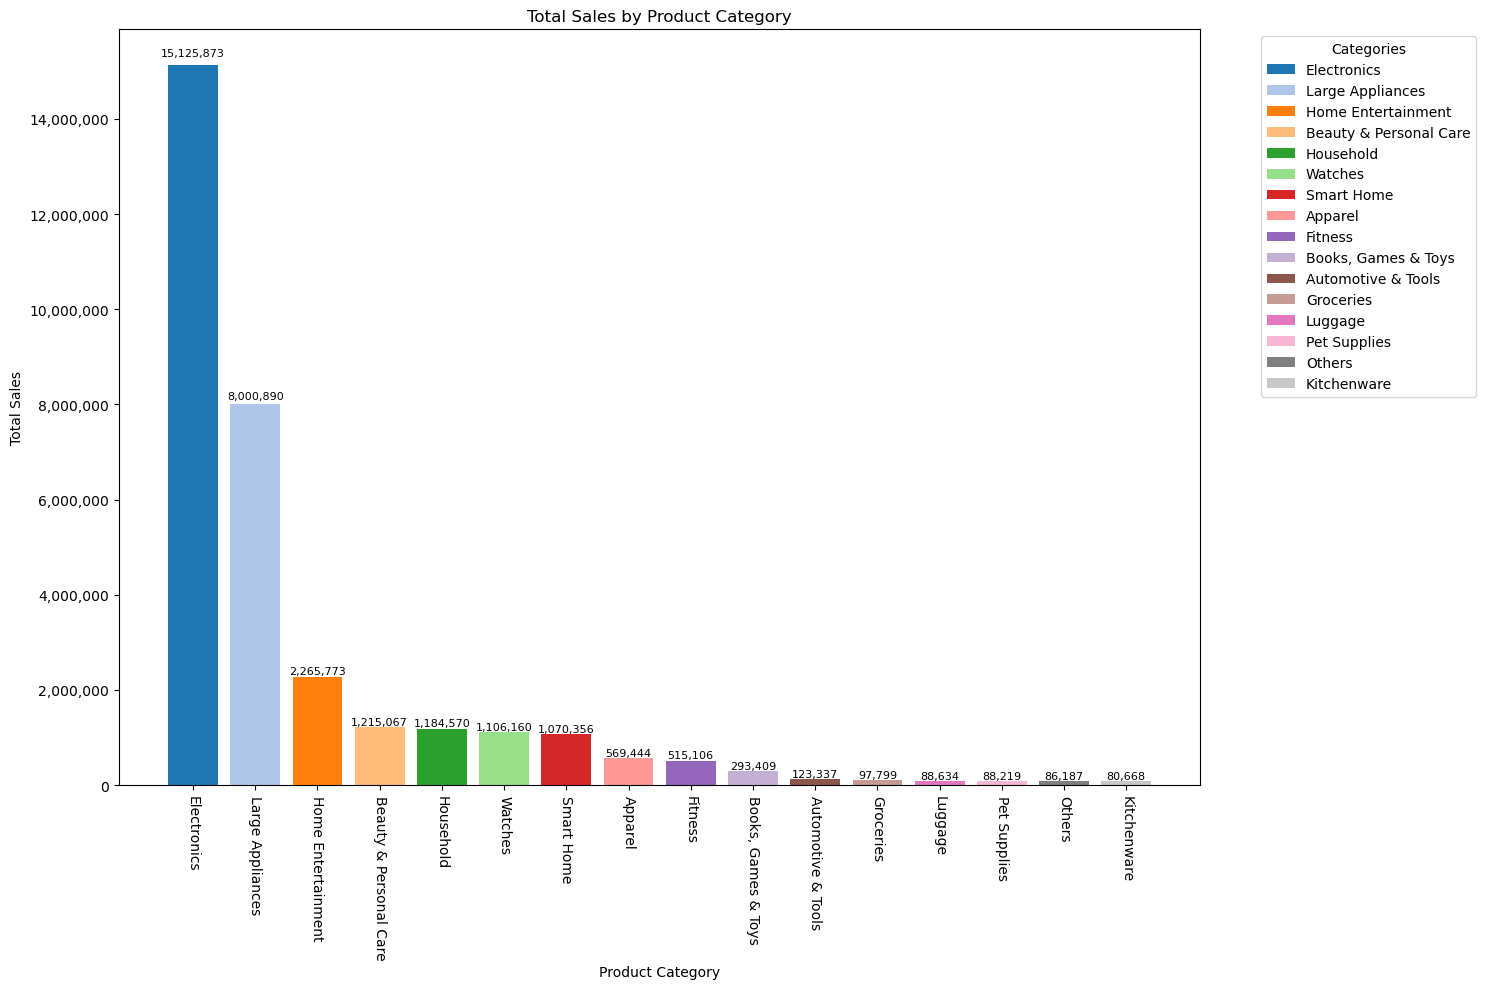

In [17]:
# 1. Total sales by product category

import matplotlib.ticker as mtick
from matplotlib.patches import Patch
sales_by_category = df2.groupby('category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
bars = plt.bar(sales_by_category.index, sales_by_category.values)
plt.xticks(rotation=-90)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + (0.01 * height),
        f'{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=8,
        color='black'
    )

colors = plt.cm.tab20.colors[:len(sales_by_category)]
bars = plt.bar(sales_by_category.index, sales_by_category.values, color=colors)
legend_elements = [
    Patch(facecolor=colors[i], label=sales_by_category.index[i]) for i in range(len(sales_by_category))
]
plt.legend(handles=legend_elements, title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

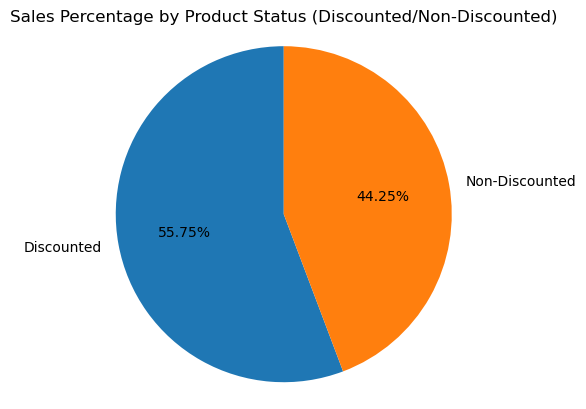

In [18]:
# 2. Total sales by product status

sales_by_status = df2.groupby('item_status')['Sales'].sum()
plt.pie(sales_by_status, labels= sales_by_status.index, autopct= '%.2f%%', startangle= 90)
plt.title('Sales Percentage by Product Status (Discounted/Non-Discounted)')
plt.axis('equal')
plt.show()

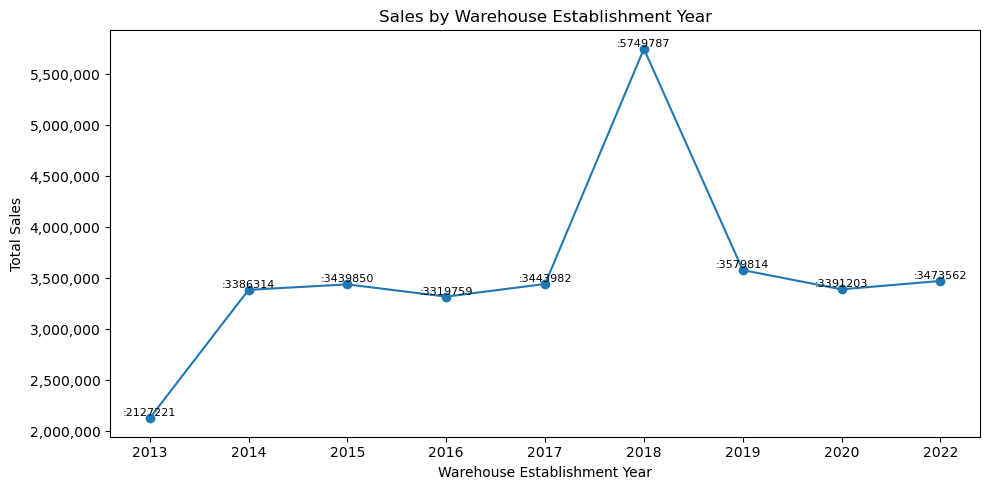

In [19]:
# 4. Total sales by warehouse establishment year

sales_by_yearEst= df2.groupby('year_est')['Sales'].sum().sort_index()
plt.figure(figsize=(10,5))
plt.plot(sales_by_yearEst.index, sales_by_yearEst.values, marker='o', linestyle='-')

plt.xlabel('Warehouse Establishment Year')
plt.ylabel('Total Sales')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Sales by Warehouse Establishment Year')

for x,y in zip(sales_by_yearEst.index, sales_by_yearEst.values):
    plt.text(x,y, f':{y:.0f}', ha= 'center', va= 'bottom', fontsize=8)

plt.tight_layout()
plt.show()

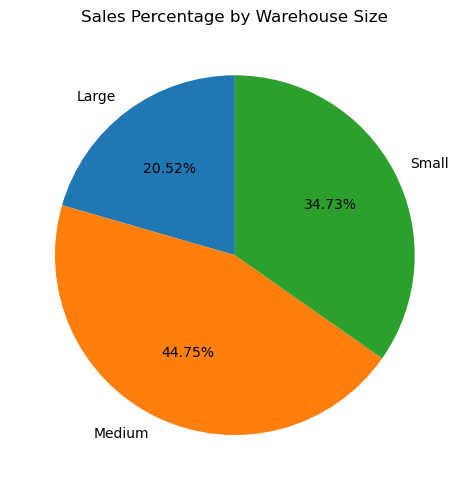

In [20]:
# 5. Total sales by warehouse size

sales_by_size= df2.groupby('warehouse_size')['Sales'].sum()
plt.figure(figsize=(10,5))
plt.pie(sales_by_size, labels= sales_by_size.index, autopct= '%.2f%%', startangle= 90)
plt.title('Sales Percentage by Warehouse Size')
plt.tight_layout()
plt.show()

/var/folders/8g/00b3gbs92n16plbgtl71gh8h0000gn/T/ipykernel_60960/183069979.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Sales', y= 'location', data= sales_by_location, palette='viridis')


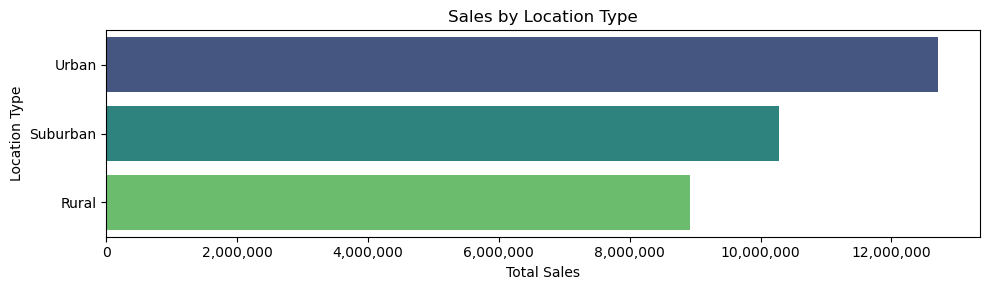

In [21]:
# 6. Total sales by location type

sales_by_location= df2.groupby('location')['Sales'].sum().reset_index()
sales_by_location= sales_by_location.sort_values('Sales', ascending= False)
plt.figure(figsize=(10,3))

ax = sns.barplot(x='Sales', y= 'location', data= sales_by_location, palette='viridis')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.title('Sales by Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Location Type')
plt.tight_layout()
plt.show()

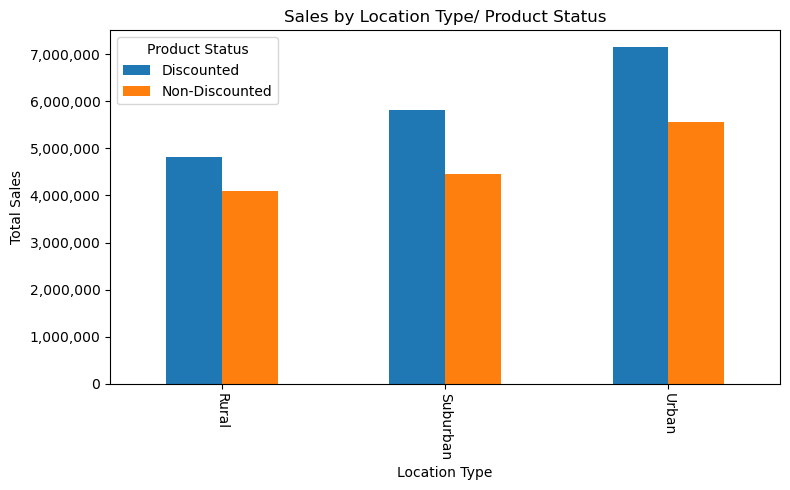

In [22]:
# 3. Total sales by warehouse location (Segmented by product status)

grouped = df2.groupby(['location','item_status'])['Sales'].sum().unstack()
grouped = grouped[['Discounted', 'Non-Discounted']]

ax = grouped.plot(kind='bar', figsize= (8,5), title='Sales by Location Type/ Product Status')
plt.xlabel('Location Type')
plt.xticks(rotation=-90)
plt.ylabel('Total Sales')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.legend(title= 'Product Status')
plt.tight_layout()
plt.show()

In [24]:
import csv
df2.to_csv('/Users/tanmac/Desktop/pbi_file.tsv', sep='\t', index=False)